In [1]:
#Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
cleaned = pd.read_csv("/Users/barnalikkapradhan/Downloads/INTERNSHIP/insurance.csv")
cleaned

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [3]:
cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 57.6+ KB


In [4]:
# no missing values found
cleaned.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [5]:
cleaned.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


## UNIVARIATE ANALYSIS

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


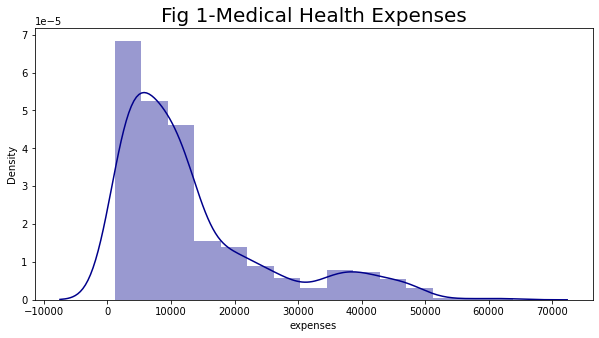

In [6]:
plt.figure(figsize=(10,5))
sns.distplot(cleaned['expenses'],bins=15,color='darkblue')
plt.title("Fig 1-Medical Health Expenses", fontsize=20)
plt.show()

In [ ]:
# In Fig 1,we can clearly see here that the distribution of expenses is rightly skewed. 
# They show variation ranging from $1121 to $63770 in the given plot for dataset of 1338 current health insurers.

In [7]:
minimum = min(cleaned['expenses'])
print("Minimum Value in expenses is:",minimum)

Minimum Value in expenses is: 1121.87


In [8]:
maximum = max(cleaned['expenses'])
print("Maximum Value in expenses is:",maximum)

Maximum Value in expenses is: 63770.43


In [9]:
def agee(X):
    if X in range(18,20):
        return '18-20'
    if X in range(20,30):
        return '20-30'
    if X in range(30,40):
        return '30-40'
    if X in range(40,50):
        return '40-50'
    elif X in range(50,60):
        return '50-60'
    else:
        return '60+'

In [10]:
cleaned['age_c']=cleaned['age'].apply(agee)

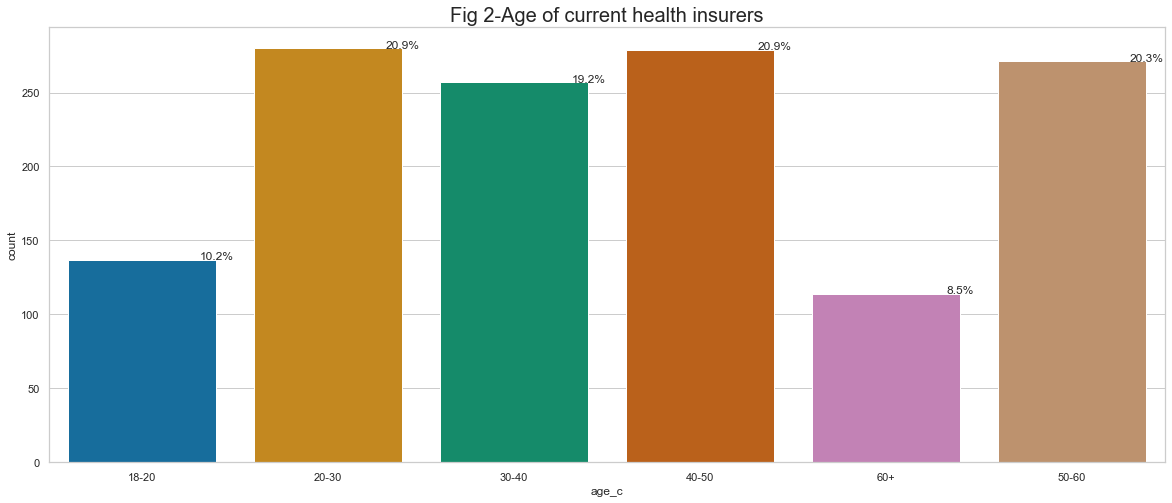

In [11]:
sns.set(style="whitegrid")
plt.figure(figsize=(20,8))
total = float(len(cleaned))
ax = sns.countplot(x="age_c", data=cleaned,palette="colorblind")
plt.title('Fig 2-Age of current health insurers', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()


In [ ]:
#In Fig 2, the age has been put in age bin category for clearer visuals, and from the countplot below one 
#can make out that age group of 20-30 and 40-50 each, make about 30 per cent of the current health insurers.
#This could be accounted for the fact that todays younger generation is more aware about the importance 
#of purchasing health insurances, whilst for 40-50 age group, they consist of the older generation,
#that are more prone to health issues henceforth its justified.

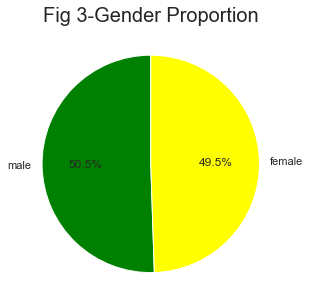

In [12]:
plt.figure(figsize=(18,5))
male = (cleaned["sex"] == "male").sum()
female = (cleaned["sex"]=="female").sum()
prop =[male,female]
plt.pie(prop,labels=["male","female"],shadow = False,colors= ['green','yellow'],startangle=90,autopct='%1.1f%%')
plt.title("Fig 3-Gender Proportion",fontsize=20)

plt.show()

In [ ]:
#In Fig 3, one can see a kind of a balanced dataset as the proportion of males is only 1 per cent higher then 
#that of females.


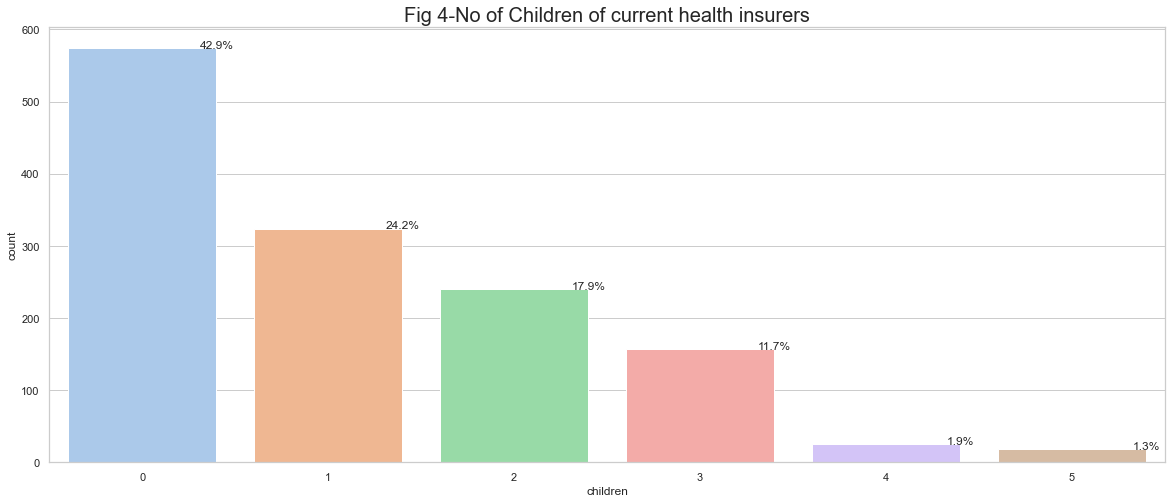

In [13]:
sns.set(style="whitegrid")
plt.figure(figsize=(20,8))
total = float(len(cleaned))
ax = sns.countplot(x="children", data=cleaned,palette="pastel")
plt.title('Fig 4-No of Children of current health insurers', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

In [ ]:
#In Fig 4,out of the total people who had current medical insurance expenses as listed in this dataset, 
#around 42.9 per cent of them have no children. 


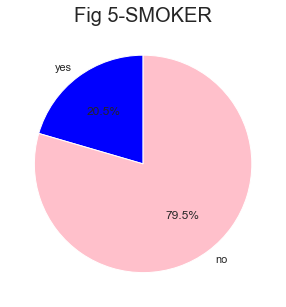

In [14]:
plt.figure(figsize=(18,5))
yes = (cleaned["smoker"] == "yes").sum()
no = (cleaned["smoker"]=="no").sum()
prop =[yes,no]
plt.pie(prop,labels=["yes","no"],shadow = False,colors= ['blue','pink'],startangle=90,autopct='%1.1f%%')
plt.title("Fig 5-SMOKER",fontsize=20)
plt.show()

In [ ]:
#In Fig 5, the dataset consisted of an imbalanced ratio of 79.5 per cent people who have current medical insurance 
#expenses to be non-smokers whilst 20.5 per cent were smokers.

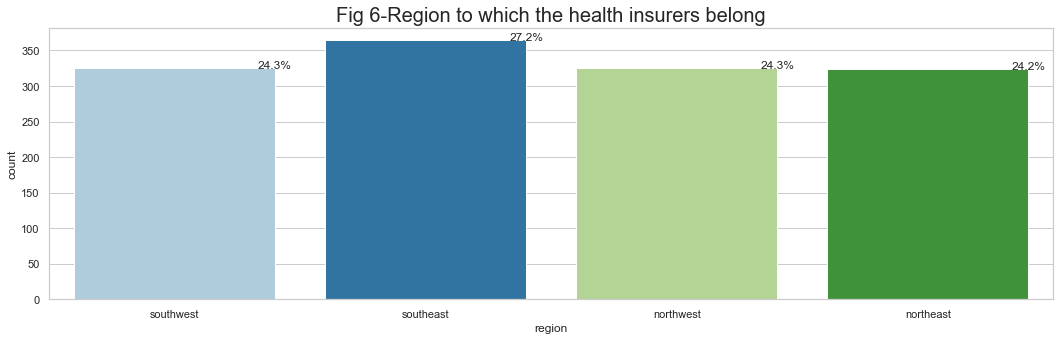

In [15]:
sns.set(style="whitegrid")
plt.figure(figsize=(18,5))
total = float(len(cleaned))
ax = sns.countplot(x="region", data=cleaned,palette="Paired")
plt.title('Fig 6-Region to which the health insurers belong', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()


In [ ]:
#In Fig 6, out of all the current health insurers in this dataset, people belonging to the South east region 
#seem to be the highest.

In [16]:
def BMI(BMI):
    if BMI<=18.5:
        return "UNDERWEIGHT"
    elif BMI<=24.9:
        return "NORMAL WEIGHT"
    elif BMI<=29.9:
        return "OVERWEIGHT"
    else:
        return "OBESE"

In [17]:
cleaned['BMI']=cleaned['bmi'].apply(BMI)

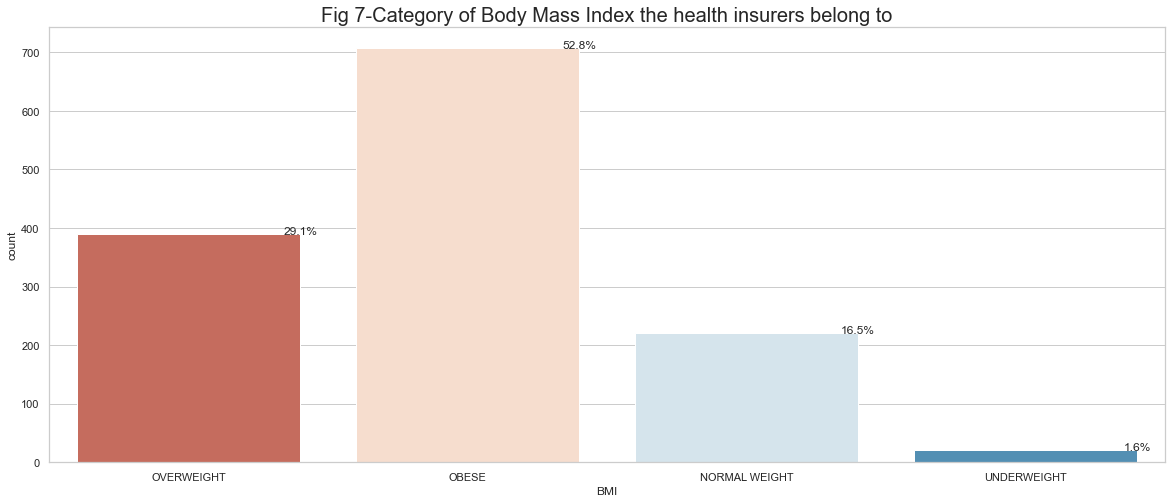

In [18]:
sns.set(style="whitegrid")
plt.figure(figsize=(20,8))
total = float(len(cleaned))
ax = sns.countplot(x ="BMI", data=cleaned,palette="RdBu")
plt.title("Fig 7-Category of Body Mass Index the health insurers belong to", fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

In [ ]:
#In Fig 7, the countplot suggests that body mass index (BMI)which have been put into categorical bins for a 
#clearer understanding, show that the obese people are the highest in number to have current medical insurance 
#expenses which makes sense as high BMI is typically associated with higher risk of chronic disease.

## MULTIVARIATE ANALYSIS

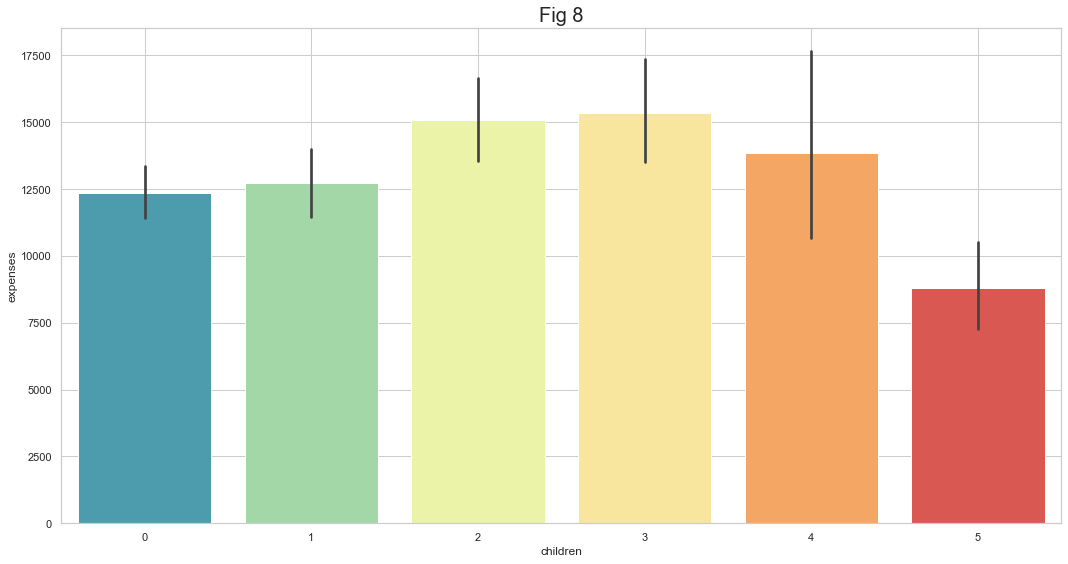

In [19]:
plt.figure(figsize=(15,8))
sns.barplot(x='children',y='expenses',data=cleaned,palette='Spectral_r',saturation=0.9)
plt.title("Fig 8", fontsize=20)
plt.tight_layout()
plt.grid(True)
plt.show()

In [ ]:
#In Fig 8, the plot gives us an undertsanding that people who have 2 and 3 children consisted of having higher 
#medical expenses throughout as compared to having more or less children then that.

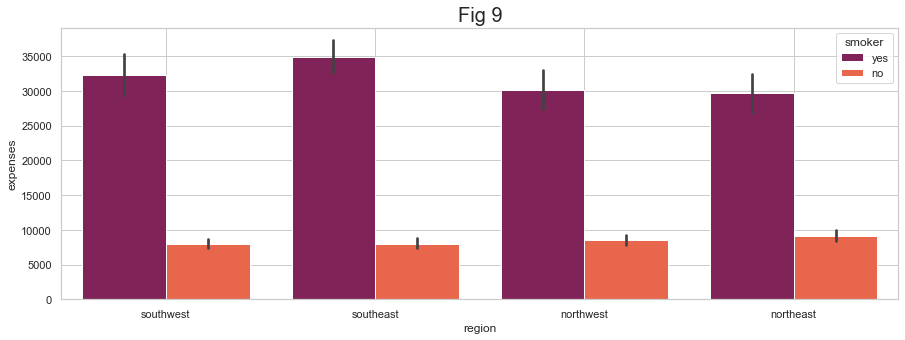

In [20]:
plt.figure(figsize=(15,5))
sns.barplot(x='region',y='expenses',hue = "smoker",data=cleaned,saturation=0.9,palette="rocket")
plt.title("Fig 9", fontsize=20)
plt.grid(True)
plt.show()

In [ ]:
#In Fig 9,the south east region have the highest medical insurance expenses as people who smoke in the northeast 
#is the highest as compared to thier counterparts.


Text(0.5, 1.0, 'Fig 10')

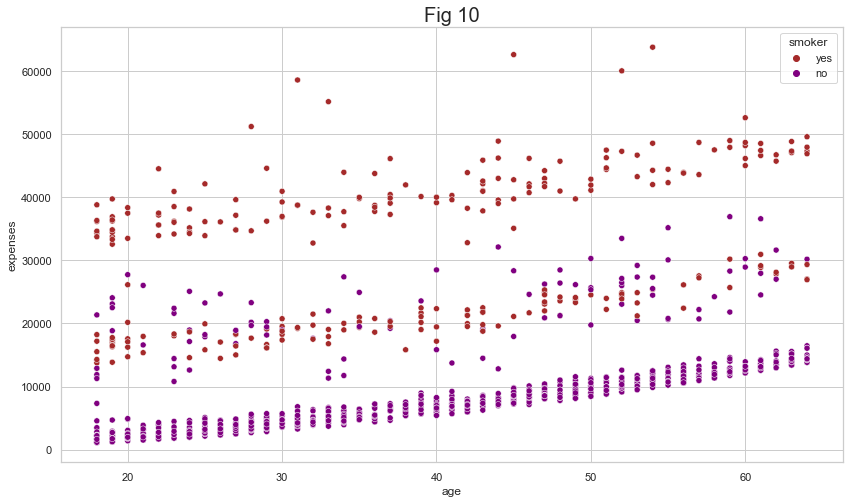

In [21]:
plt.figure(figsize=(14,8))
sns.scatterplot(data=cleaned, x='age', y='expenses',hue="smoker",palette=['brown','purple'])
plt.title("Fig 10", fontsize=20)


In [ ]:
#In Fig 10,for the age-expenses plot we see that smokers tend to pay more than non-smokers but the line slope 
#seems almost the same, implying that the increase of medical expenses with respect to the age is the same for 
#both categories.

Text(0.5, 1.0, 'Fig 11')

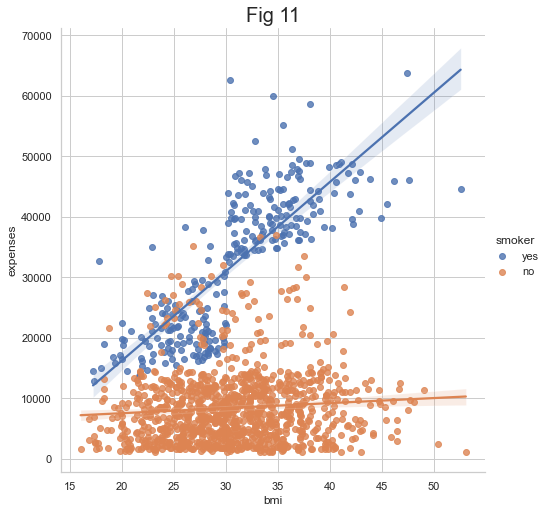

In [22]:
sns.lmplot(data=cleaned, x='bmi', y='expenses',hue="smoker",height = 7) 
plt.title("Fig 11", fontsize=20)


In [ ]:
#In Fig 11, for the bmi-expenses plot  we see that smokers pay more than non-smokers but here the line slope 
#is much higher, resulting in a massive medical expenses increase when the bmi raises.
#The scatterplot above suggests that body mass index (BMI) and expenses are positively correlated, 
#where customers with higher BMI typically also tend to pay more in insurance premium.

